In [1]:
import pandas as pd
import eventstudy as es
import numpy as np
import matplotlib.pyplot as plt
from eventstudy import excelExporter

In [2]:
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick

In [ ]:
#to convert from simple to log return r = log(R + 1)
#to convert from log to discrete return R = exp(r) – 1

In [3]:
plt.rc('figure', figsize=(10, 5))
pd.set_option('display.max_columns', None)

In [ ]:
stocks = pd.read_csv("Events_Study2.csv", index_col= 'date')

df_shape= (stocks.shape)
print(f"There are {df_shape[0]} rows and {df_shape[1]} columns in the dataset")
print(f"Data timeperiod covers: {min(stocks.index)} to {max(stocks.index)}")

In [ ]:
stocks_data = stocks.copy()

In [ ]:
stocks_data.head()

In [ ]:
# create empty dataframe for log returns information
log_returns = pd.DataFrame()

# calculate log returns of each asset
# loop through each column in dataframe and and calculate the daily log returns 
# add log returns column to new a dataframe
for col in stocks_data.columns:
    # dates are given in reverse order so need to set diff to -1.
    log_returns[col] = np.log(stocks_data[col]).diff(-1)
    
#check output of log returns dataframe
log_returns.head()

**1. IMPORT THE DATA**

In [4]:
es.Single.import_returns('returns_GAFAM.csv', date_format ='%m/%d/%Y')
es.Single.import_FamaFrench(path = r'C:\Users\nherm\Downloads\example\F-F_3_F.csv')
es.Single.import_FamaFrench(path = r'C:\Users\nherm\Downloads\example\F-F_5_F.csv')

**1.1 SINGLE EVENT**

In [11]:
#Announcement Date
#Date format = “%Y-%m-%d”
#Announcement Date= yyyy-mm-dd 25/01/2013
#Effective Date = yyyy-mm-dd  18/4/2013
#If event date is '2013-06-13', we have to enter as event '2013-06-12' because the model consider
#as event the closing 
single_event = es.Single.market_model(
    security_ticker = 'CHTR',
    market_ticker = 'SPX',
    event_date = np.datetime64('2015-05-23'),
    event_window = (-10,10),
    estimation_size = 230,
    buffer_size = 20,
    keep_model = False
)

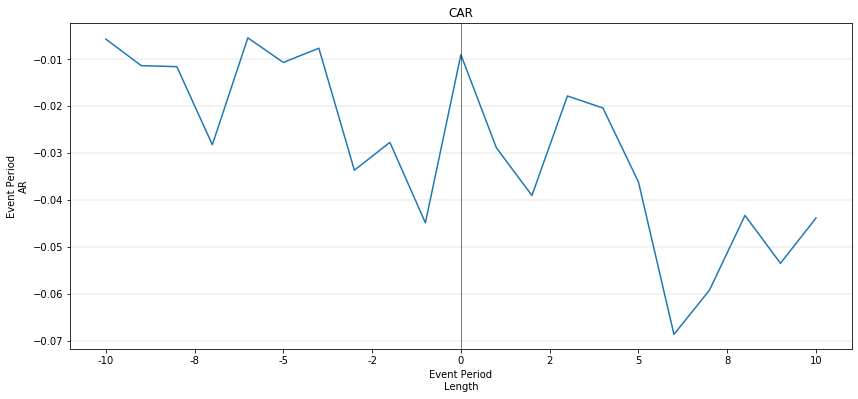

In [12]:
single_event.plot(AR=False, CI=False, confidence=0.95)
plt.xlabel("Event Period\nLength")
plt.ylabel("Event Period\nAR")
plt.grid(axis='y', color = 'k', linewidth=.1)
#plt.xticks(x)
plt.title("CAR")
plt.show()

In [278]:
single_event.results(asterisks = True, decimals=[5,5,4,5,2,2])
#Significance level: *** at 99%, ** at 95%, * at 90%

,AR,Variance AR,CAR,Variance CAR,T-stat,P-value
-10,-0.00458,0.00037,-0.0046,0.00037,-0.24,0.41
-9,0.00018,0.00037,-0.0044,0.00075,-0.16,0.44
-8,0.00392,0.00037,-0.0005,0.00112,-0.01,0.49
-7,0.00084,0.00037,0.0004,0.00149,0.01,0.50
-6,-0.03060,0.00037,-0.0302,0.00186,-0.70,0.24
-5,-0.00053,0.00037,-0.0308,0.00224,-0.65,0.26
-4,-0.01259,0.00037,-0.0434,0.00261,-0.85,0.20
-3,-0.02613,0.00037,-0.0695,0.00298,-1.27,0.10
-2,0.01756,0.00037,-0.0519,0.00335,-0.90,0.19
-1,0.00969,0.00037,-0.0423,0.00373,-0.69,0.24


In [261]:
#Define the results table to export
AR = single_event.results(asterisks = True, decimals=[5,5,4,5,2,2])

In [262]:
#To export the results table

AR.to_csv(r"D:\MscThesis\Results\AAR\ALK.csv")
#release_10K.to_excel(r"D:\MscThesis\Results\Impure_Sample\.csv")

In [ ]:
 ar_ff3 = es.FamaFrench_3factor(
     security_ticker = 'CRM', 
     event_date = np.datetime64('2007-01-09'),
     event_window = (-5,+5)
 )

In [ ]:
 ar_ff5 = es.Single.FamaFrench_5factor(
     security_ticker = 'CRM', 
     event_date = np.datetime64('2013-01-25'),#format=yyyy/mm/dd
     event_window = (-5,+5),
     estimation_size = 230,
     buffer_size = 20
 )

In [ ]:
cons_mean = es.Single.constant_mean(
    security_ticker = 'CRM',
    market_ticker = 'SPX',
    event_date = np.datetime64('2013-01-25'),
    event_window = (-10,10),
    estimation_size = 230,
    buffer_size = 20,
    keep_model = False
)

**2. AR CALCULATION MM**

In [108]:
car_mm = es.Multiple.from_csv(
    path = r"C:\Users\nherm\Downloads\Forward_Reverse_Splits\IS_R_AD.csv", # the path to the csv file created
    event_study_model = es.Single.market_model,
    event_window = (1,+250),
    estimation_size = 230,
    buffer_size =0,
    date_format = '%d/%m/%Y',
    ignore_errors = True
)
#r'C:\Users\nherm\Downloads\Msc_Thesis\Clean_Sample_Ann_Date_MSc.csv

In [6]:
print(car_mm.error_report())

No error.


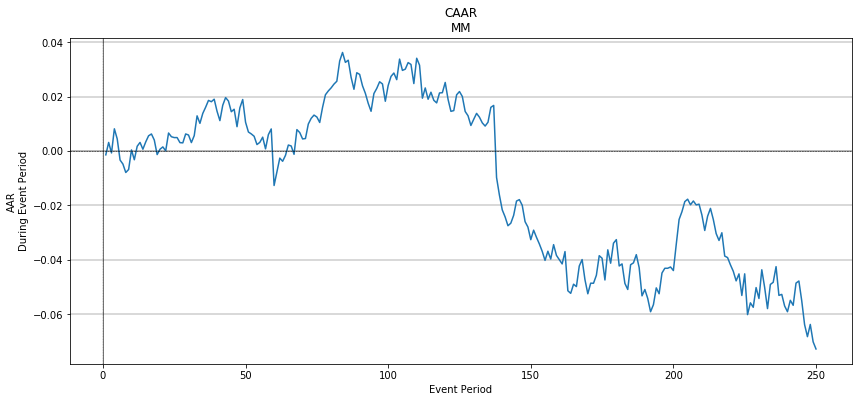

In [109]:
plt.rc('figure', figsize=(14, 6))
car_mm.plot(CI=False, confidence=.95)
plt.xlabel("Event Period")
plt.ylabel("AAR\nDuring Event Period")
plt.grid(axis='y', color = 'k', linewidth=.30)
plt.axhline(y=0, color="k", linestyle="-", linewidth=.30)
plt.axvline(color="k", linestyle="--", linewidth=.30)
#plt.text(4, .0076,'CARR')
#plt.plot(marker = 'D', linestyle = '-', color = 'k', linewidth=.5, markersize = 1, 
         #markercolor = "w", markeredgewidth=1, markeredgecolor="black")
#plt.legend(('CAAR Clean', 'CAAR Impure'), loc='upper right')    
#plt.axis([-5, 5, -.0050, .01500])
#plt.xticks(x)
plt.title("CAAR\nMM")
plt.show()

In [110]:
car_mm.results(asterisks = True, decimals=[7,5,5,5,2,3])
#Significance level: *** at 99%, ** at 95%, * at 90%

,AAR,Variance AAR,CAAR,Variance CAAR,T-stat,P-value
1,-0.001443,0.00003,-0.00144,0.00003,-0.29,0.387
2,0.004558,0.00003,0.00312,0.00005,0.44,0.331
3,-0.003858,0.00003,-0.00074,0.00008,-0.09,0.466
4,0.008877,0.00003,0.00813,0.00010,0.81,0.210
5,-0.003705,0.00003,0.00443,0.00013,0.39,0.347
...,...,...,...,...,...,...
246,-0.008767,0.00003,-0.06385,0.00625,-0.81,0.210
247,-0.004446,0.00003,-0.0683,0.00628,-0.86,0.194
248,0.004498,0.00003,-0.0638,0.00630,-0.80,0.211
249,-0.006400,0.00003,-0.0702,0.00633,-0.88,0.189


In [111]:
car_mm.get_CAR_dist(4)

,Mean,Variance,Kurtosis,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
1,-0.0014,0.0001,-0.9722,-0.0186,-0.0085,-0.0009,0.0059,0.0182
2,0.0031,0.0004,-0.2685,-0.0284,-0.0088,0.0033,0.0124,0.0443
3,-0.0007,0.0003,-1.0431,-0.0250,-0.0126,-0.0043,0.0086,0.0281
4,0.0081,0.0007,-0.9312,-0.0177,-0.0110,-0.0014,0.0204,0.0541
5,0.0044,0.0011,-1.0896,-0.0371,-0.0245,-0.0013,0.0224,0.0587
...,...,...,...,...,...,...,...,...
246,-0.0639,0.0484,-0.5784,-0.4465,-0.1497,-0.0127,0.0455,0.2988
247,-0.0683,0.0476,-0.5746,-0.4518,-0.1533,-0.0204,0.0403,0.2891
248,-0.0638,0.0459,-0.6200,-0.4344,-0.1527,-0.0181,0.0438,0.2878
249,-0.0702,0.0474,-0.7570,-0.4398,-0.1982,-0.0199,0.0553,0.2862


In [113]:
#Define the results table to export
export = car_mm.results(asterisks = True, decimals=[5,5,3,5,2,3])

In [114]:
#To export the results table

export.to_excel(r"D:\MscThesis\Results_F_R\IS_Reverse_LT.xlsx")
#release_10K.to_excel(r"D:\MscThesis\Results\Impure_Sample\.csv")

In [ ]:
#To export car plot into jpg
#fig.save(r"D:\DataBases\Results\Clean_Sample\figure1.jpg", dpi=200)

In [121]:
plot = pd.read_excel(r"D:\MscThesis\R_F.xlsx", sheet_name="Reverse_LT")#,sheet_name="AAR"
#plot.set_index('days', inplace=True)
plot

,days,Clean_Sample,Impure_Sample
0,1,-0.582,-0.144
1,2,0.119,0.456
2,3,-0.064,-0.386
3,4,0.973,0.888
4,5,-0.766,-0.371
...,...,...,...
245,246,-1.446,-0.877
246,247,-0.270,-0.445
247,248,0.362,0.450
248,249,0.040,-0.640


In [60]:
import matplotlib.ticker as mtick

In [117]:
plt.rc('figure', figsize=(15, 6))

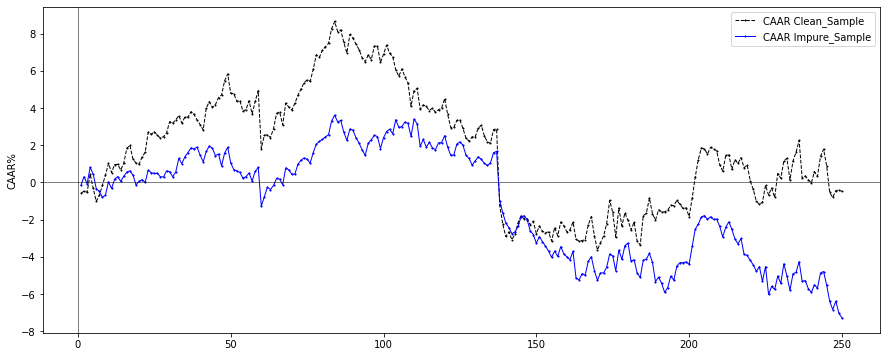

In [122]:
#CAAR plot
x= plot["days"]
y1= plot["Clean_Sample"].cumsum()
y2= plot["Impure_Sample"].cumsum()
plt.plot(x,y1,  marker='o', linestyle = '--',color = 'black', linewidth= 1, markersize = 1,label="CAAR Clean_Sample")
#plt.title('CAAR\nEx-Date')
#plt.xlabel('Event period')
plt.ylabel('CAAR%')

plt.plot(x,y2, marker='D', linestyle = '-',color = 'b', linewidth= 1, markersize = 1,label="CAAR Impure_Sample")
#plt.grid(axis='y', color = 'k', linewidth=.5)
plt.axhline(y=0, color="k", linestyle="-", linewidth=.5)
plt.axvline(color="k", linestyle="-", linewidth=.5)

plt.yticks()
#plt.xticks(x)
plt.legend()
plt.show()
##FF8C00

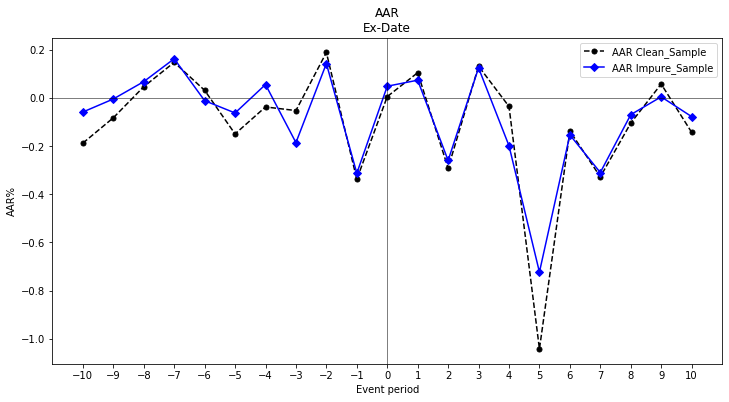

In [88]:
#AAR plot
x= plot["days"]
y1= plot["Clean_Sample"]
y2= plot["Impure_Sample"]
plt.plot(x,y1,  marker='o', linestyle = '--',color = 'black', linewidth= 1.5, markersize = 5,label="AAR Clean_Sample")
plt.title('AAR\nEx-Date')
plt.xlabel('Event period')
plt.ylabel('AAR%')
plt.plot(x,y2, marker='D', linestyle = '-',color = 'b', linewidth= 1.5, markersize = 5,label="AAR Impure_Sample")
#plt.grid(axis='y', color = 'k', linewidth=.1)
plt.axhline(y=0, color="k", linestyle="-", linewidth=.5)
plt.axvline(color="k", linestyle="-", linewidth=.5)
plt.xticks(x)
plt.legend()
plt.show()
##FF8C00

C:\Users\nherm\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


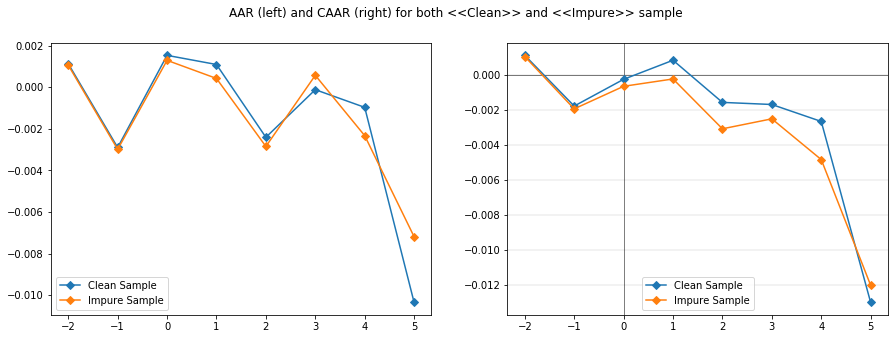

In [170]:
#2 plot side bby side
x= plot["days"]
aar1= plot["Clean_Sample"]
aar2= plot["Impure_Sample"]

caar1= plot["Clean_Sample"].cumsum()
caar2= plot["Impure_Sample"].cumsum()

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('AAR (left) and CAAR (right) for both <<Clean>> and <<Impure>> sample')
plt.grid(axis='y', color = 'k', linewidth=.1)
plt.axhline(y=0, color="k", linestyle="-", linewidth=.5)
plt.axvline(color="k", linestyle="-", linewidth=.5)
plt.xticks(x)
#plt.xlim(85, 101)    
ax1.plot(x,aar1, label='Clean Sample', marker = 'D')
ax1.plot(x,aar2, label='Impure Sample', marker = 'D')
ax1.legend()
ax2.plot(x,caar1,label='Clean Sample', marker = 'D')
ax2.plot(x,caar2, label='Impure Sample', marker = 'D')
ax2.legend()
fig.show()

**3.CAAR FARMA FRENCH**

In [294]:
caar_ff3 = es.Multiple.from_csv(
    path = r'C:\Users\nherm\Downloads\Msc_Thesis\Impure_Sample_Ann_Date_MSc.csv', # the path to the csv file created
    event_study_model = es.Single.FamaFrench_3factor,
    event_window = (-10,+10),
    estimation_size = 230,
    buffer_size = 20,
    date_format = '%d/%m/%Y',
    ignore_errors = False
)

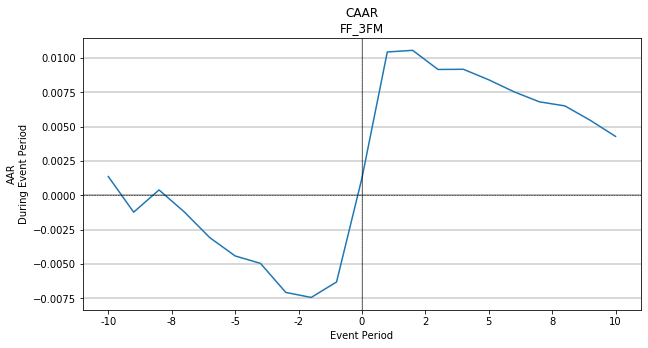

In [299]:
caar_ff3.plot(CI=False, confidence=.95)
plt.xlabel("Event Period")
plt.ylabel("AAR\nDuring Event Period")
plt.grid(axis='y', color = 'k', linewidth=.30)
plt.axhline(y=0, color="k", linestyle="-", linewidth=.30)
plt.axvline(color="k", linestyle="--", linewidth=.30)
#plt.text(4, .0076,'CARR')
#plt.plot(marker = 'D', linestyle = '-', color = 'k', linewidth=.5, markersize = 1, 
         #markercolor = "w", markeredgewidth=1, markeredgecolor="black")
#plt.legend(('CAAR Clean', 'CAAR Impure'), loc='upper right')    
#plt.axis([-5, 5, -.0050, .01500])
#plt.xticks(x)
plt.title("CAAR\nFF_3FM")
plt.show()

In [300]:
caar_ff3.results(decimals=[5,5,3,5,2,3])

,AAR,Variance AAR,CAAR,Variance CAAR,T-stat,P-value
-10,0.00137,0.0,0.001,0.00000,1.00,0.158
-9,-0.00260,0.0,-0.001,0.00000,-0.63,0.264
-8,0.00162,0.0,0.0,0.00001,0.17,0.433
-7,-0.00161,0.0,-0.001,0.00001,-0.44,0.329
-6,-0.00186,0.0,-0.003,0.00001,-1.00,0.158
-5,-0.00133,0.0,-0.004 *,0.00001,-1.31,0.095
-4,-0.00054,0.0,-0.005 *,0.00001,-1.37,0.086
-3,-0.00212,0.0,-0.007 **,0.00002,-1.82,0.034
-2,-0.00036,0.0,-0.007 **,0.00002,-1.81,0.035
-1,0.00113,0.0,-0.006 *,0.00002,-1.46,0.073


In [297]:
caar_ff3.get_CAR_dist(4)

,Mean,Variance,Kurtosis,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,0.0014,0.0002,1.9075,-0.0370,-0.0065,-0.0002,0.0072,0.0440
-9,-0.0012,0.0003,1.7364,-0.0571,-0.0106,-0.0010,0.0076,0.0535
-8,0.0004,0.0004,0.7749,-0.0547,-0.0110,0.0006,0.0122,0.0549
-7,-0.0012,0.0005,0.1474,-0.0569,-0.0128,-0.0006,0.0122,0.0524
-6,-0.0031,0.0008,6.1692,-0.1448,-0.0161,-0.0017,0.0120,0.0852
-5,-0.0044,0.0009,6.0539,-0.1585,-0.0165,-0.0018,0.0109,0.0792
-4,-0.0050,0.0011,8.1399,-0.1851,-0.0177,-0.0023,0.0095,0.0852
-3,-0.0071,0.0012,1.7827,-0.1390,-0.0292,-0.0014,0.0126,0.1022
-2,-0.0074,0.0014,2.1279,-0.1576,-0.0270,-0.0033,0.0134,0.0992
-1,-0.0063,0.0018,2.0245,-0.1728,-0.0339,-0.0055,0.0140,0.1130


In [ ]:
caar_ff3f.to_excel()

**AR and CAR FF_5 Factors Model

In [ ]:
 ar_ff5 = es.Single.FamaFrench_5factor(
     security_ticker = 'CRM', 
     event_date = np.datetime64('2013-01-25'),#format=yyyy/mm/dd
     event_window = (-5,+5),
     estimation_size = 230,
     buffer_size = 20
 )

In [ ]:
ar_ff5.results(decimals=[5,5,3,5,2,3]) 

In [ ]:
ar_ff5.

In [126]:
0.065 <= 0.05

False